<h1 style="text-align:center;"> Linear Regression, normal equation and GD using TensorFlow</h1>

In [1]:
import pandas as pd
import numpy as np 
import pylab as plt
%matplotlib inline

# 1. Normal equation

In [2]:
num_of_observation = 500
unkown_std = 0.9
num_of_feature = 10
a = np.linspace(1,num_of_feature+1,num_of_feature+1)
x = np.random.uniform(0, 10, (num_of_feature,num_of_observation))
unkown = np.matrix(np.random.normal(0,unkown_std,num_of_observation)).T

A = np.matrix(a).T
X = np.matrix(
    np.vstack((np.ones(num_of_observation),
               x))).T
Y = X * A + unkown

## 1.1 Using numpy

In [3]:
a_hat = X.I * Y # which is (X.T * X).I * (X.T * Y)

In [4]:
err_abs = a_hat.T - a
mse = err_abs.dot(err_abs.T) / max(err_abs.shape)
mse

matrix([[ 0.00036208]])

## 1.2 Scikit-Learn

In [5]:
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x.T, Y)

np.mean((np.append(regr.intercept_,regr.coef_) - a)**2)

0.00036208190886896348

## 1.3 Using TensorFlow

In [6]:
import tensorflow as tf

In [7]:
Xph = tf.placeholder("float", shape=[X.shape[0], X.shape[1]]) # create symbolic variables
Yph = tf.placeholder("float")

XtX   = tf.matmul(Xph,Xph,transpose_a=True)
XtX_i = tf.matrix_inverse(XtX)
XtY   = tf.matmul(Xph,Yph,transpose_a=True)
A_hat = tf.matmul(XtX_i,XtY)

sess = tf.Session()

a_hat_tf = sess.run(A_hat, feed_dict={Xph: X, Yph: Y})

err_abs_tf = a_hat_tf.T - a
mse_tf = err_abs_tf.dot(err_abs_tf.T) / max(err_abs_tf.shape)
mse_tf

array([[ 0.00035079]])

# 2. Gradient descent

## 2.1 TensorFlow

### 2.1.1 Batch-GD

In [8]:
Xph = tf.placeholder("float", shape=[X.shape[0],X.shape[1]]) # create symbolic variables
Yph = tf.placeholder("float")

w = tf.Variable(np.zeros((num_of_feature+1,1), dtype="float32"), name="weights")

y_model = tf.matmul(Xph, w)

cost = (tf.matmul(Yph-y_model, Yph-y_model, transpose_a=True))

train_op = tf.train.GradientDescentOptimizer(0.000001).minimize(cost)

sess = tf.Session()
init = tf.initialize_all_variables() 
sess.run(init)

errors = []
for i in range(1000):
    errors.append(np.mean((sess.run(w).T - a)**2))
    sess.run(train_op, feed_dict={Xph: X, Yph: Y})

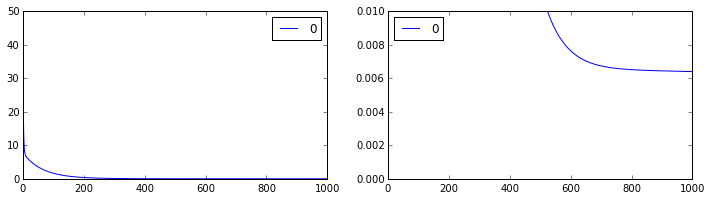

In [9]:
err_pd = pd.DataFrame(errors)
f, ((ax1, ax2)) = plt.subplots(ncols=2,nrows=1)
f.set_size_inches(12, 3)
ax = err_pd.plot(ax=ax1)
ax = err_pd.plot(ax=ax2, ylim=[0,0.01])

### 2.1.2 SGD

In [10]:
Xph = tf.placeholder("float", shape=[1,X.shape[1]]) # create symbolic variables
Yph = tf.placeholder("float")

w = tf.Variable(np.zeros((num_of_feature+1,1), dtype="float32"), name="weights")

y_model = tf.matmul(Xph, w)

cost = (tf.matmul(Yph-y_model, Yph-y_model, transpose_a=True))

train_op = tf.train.GradientDescentOptimizer(0.0002).minimize(cost)

sess = tf.Session()
init = tf.initialize_all_variables()
sess.run(init)

errors = []
for i in range(5):
    for x_ ,y_ in zip(X, Y):
        errors.append(np.mean((sess.run(w).T - a)**2))
        sess.run(train_op, feed_dict={Xph: x_, Yph: y_})

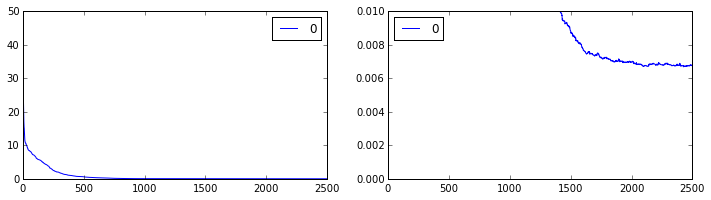

In [11]:
err_pd = pd.DataFrame(errors)
f, ((ax1, ax2)) = plt.subplots(ncols=2,nrows=1)
f.set_size_inches(12, 3)
ax = err_pd.plot(ax=ax1)
ax = err_pd.plot(ax=ax2, ylim=[0,0.01])

### 2.1.3 Adam algorithm

In [12]:
Xph = tf.placeholder("float", shape=[1,X.shape[1]]) # create symbolic variables
Yph = tf.placeholder("float")

w = tf.Variable(np.zeros((num_of_feature+1,1), dtype="float32"), name="weights")

y_model = tf.matmul(Xph, w)

cost = (tf.matmul(Yph-y_model, Yph-y_model, transpose_a=True))

train_op = tf.train.AdamOptimizer(0.04,0.7, 0.8).minimize(cost)

sess = tf.Session()
init = tf.initialize_all_variables() 
sess.run(init)

errors = []
for i in range(20):
    for x_ ,y_ in zip(X, Y):
        errors.append(np.mean((sess.run(w).T - a)**2))
        sess.run(train_op, feed_dict={Xph: x_, Yph: y_})

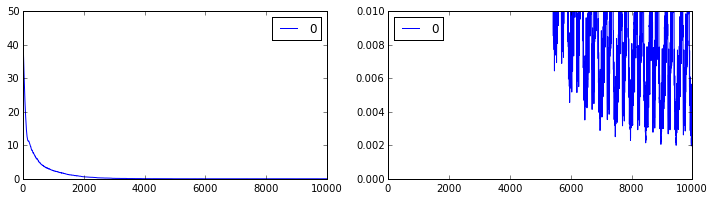

In [13]:
err_pd = pd.DataFrame(errors)
f, ((ax1, ax2)) = plt.subplots(ncols=2,nrows=1)
f.set_size_inches(12, 3)
ax = err_pd.plot(ax=ax1)
ax = err_pd.plot(ax=ax2, ylim=[0,0.01])